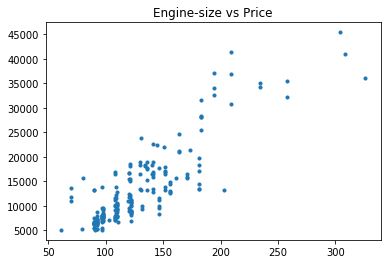

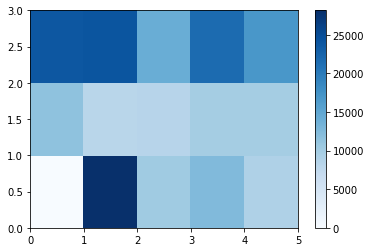

F_onewayResult(statistic=59.147713684561346, pvalue=5.7931894972840214e-05)
F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)
Strong Correlation 0.7562637525813358 4.476825092303262e-39


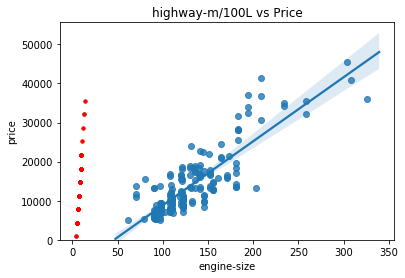

[[14765.10996165]
 [14765.10996165]
 [18238.73179583]
 [11291.48812748]
 [21712.35363   ]
 [18238.73179583]
 [18238.73179583]
 [18238.73179583]
 [25185.97546418]
 [21712.35363   ]
 [14765.10996165]
 [14765.10996165]
 [14765.10996165]
 [14765.10996165]
 [18238.73179583]
 [21712.35363   ]
 [21712.35363   ]
 [25185.97546418]
 [  870.62262495]
 [ 4344.24445913]
 [ 4344.24445913]
 [ 4344.24445913]
 [ 7817.8662933 ]
 [11291.48812748]
 [ 7817.8662933 ]
 [ 7817.8662933 ]
 [ 7817.8662933 ]
 [11291.48812748]
 [11291.48812748]
 [18238.73179583]
 [  870.62262495]
 [ 7817.8662933 ]
 [ 4344.24445913]
 [ 7817.8662933 ]
 [ 7817.8662933 ]
 [ 7817.8662933 ]
 [ 7817.8662933 ]
 [11291.48812748]
 [11291.48812748]
 [11291.48812748]
 [11291.48812748]
 [14765.10996165]
 [11291.48812748]
 [14765.10996165]
 [ 4344.24445913]
 [ 4344.24445913]
 [14765.10996165]
 [28659.59729835]
 [28659.59729835]
 [32133.21913253]
 [11291.48812748]
 [ 7817.8662933 ]
 [ 7817.8662933 ]
 [ 7817.8662933 ]
 [ 7817.8662933 ]
 [21712.35

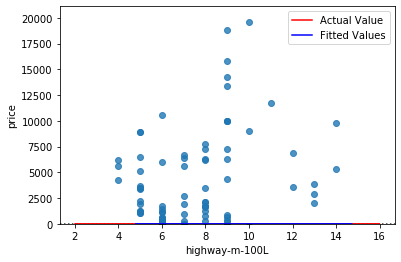

In [118]:
"""
    In this module we are going to learn
    Exploitery Data Analysis

        1) Descriptive Statistics
        2) Group By
        3) ANOVA
        4) Pearson Correlation
        5) Liner Regression (Single Liner Regression/Multiple Liner Regression)
        6) Model Evaluation Using Visualization
        7) Polynomal Regression and Piplelines

"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error



inFile = 'files/test_cars.csv'
df = pd.read_csv(inFile)

# cleaning up data

df["normalized-losses"].fillna(df["normalized-losses"].mean(),inplace=True)
df["bore"].fillna(df["bore"].mean(), inplace=True)
df["stroke"].fillna(df["stroke"].mean(), inplace=True)
df["price"].fillna(df["price"].mean(), inplace=True)


df["city-mpg"] = 235//df["city-mpg"]
df["highway-mpg"] = 235//df["highway-mpg"]

df.rename(columns={"city-mpg":"city-m-100L"}, inplace=True)
df.rename(columns={"highway-mpg":"highway-m-100L"}, inplace=True)

# scaling data, we are min max sacling to scale length, height and width

df["height"] = ((df["height"] - df["height"].min())/(df["height"].max() - df["height"].min()))
df["width"] = ((df["width"] - df["width"].min())/(df["width"].max() - df["width"].min()))
df["length"] = ((df["length"] - df["length"].min())/(df["length"].max() - df["length"].min()))


# Data binning / grouping / categorizing

binwidth = (df["price"].max() - df["price"].min())//4
bins = range(df["price"].min().astype(int), df["price"].max().astype(int), binwidth.astype(int))
group_name = ['low','medium','high']
df['price-binned'] = pd.qcut(df["price"], 3, labels=group_name)

# One hot encoding / converting string values into numeric values

data = pd.get_dummies(df['fuel-type'])
df['gas_cars'] = data['gas']
df['diesel_cars'] = data['diesel']

"""
    Plotting charts
    
"""

x = df["engine-size"]
y = df["price"]
area = np.pi*3

plt.scatter(x,y,s=area)
plt.title('Engine-size vs Price')
plt.show()


"""
    
    Grouping data and summerizing data
    Ploting heatmap based on the result
    

"""


newDF = df[['drive-wheels','body-style', 'price']]
df_grp = newDF.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_pivot =df_grp.pivot_table(index='drive-wheels',columns='body-style',fill_value=0)

plt.pcolor(df_pivot,cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

"""

    Here we are going to see the variance between
    items.(ANOVA)

"""

df_anova = df[['make','price']]
group_anova = df_anova.groupby(["make"])
anova_f_test_result = scipy.stats.f_oneway(group_anova.get_group("jaguar")["price"],group_anova.get_group("audi")["price"])
print(anova_f_test_result)
anova_f_test_result = scipy.stats.f_oneway(group_anova.get_group("jaguar")["price"],group_anova.get_group("honda")["price"])
print(anova_f_test_result)

"""
        Correlation between engine-size and price
        
"""

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

"""
    Pearson Correlation
    
"""
df_clean = df[['horsepower', 'price']].dropna()
df_clean.head()
pearson_coef, p_value = scipy.stats.pearsonr(df_clean['horsepower'].astype(float),df_clean['price'].astype(float))

if pearson_coef<= 1 and p_value < 0.001:
    print("Strong Correlation",pearson_coef, p_value)
elif pearson_coef< -1 and p_value < 0.05:
    print("Negative Correlation",pearson_coef, p_value)
else:
    print("Moderate Correlation",pearson_coef, p_value)

"""
    
    In this part we are covering single liner regression (SLR)

"""

lr_model = LinearRegression()#Liner regression constructor from scikit learn

X = df[['highway-m-100L']]
y = df[['price']]
lr_model.fit(X,y)
Y_pred = lr_model.predict(X)

plt.scatter(X,Y_pred,s=area,color='red')
plt.title('highway-m/100L vs Price')
plt.show()

"""

    Multiple Liner Regression

"""


# X = np.array(df[['horsepower','highway-m-100L']]).astype(int)
# Y = np.array(df[['price']]).astype(int)

# regr = LinearRegression()
# regr.fit(X,Y)
# Y_predict = regr.predict(X)

# plt.scatter(X,Y_pred,s=area,color='red')
# plt.show()


"""
    
    Model evalutation and visualization:
    
        1) The relationship between two variables
        2) The strength of correlation
        3) The direction of relationship(+/-)

"""

sns.residplot(df['highway-m-100L'],df['price'])
X = np.array(df[['price']]).astype(int)
y = df[['highway-m-100L']]
lr_model.fit(X,y)
Y_pred = lr_model.predict(X)

ax1 = sns.distplot(df['highway-m-100L'],hist=False, color='r', label='Actual Value')
sns.distplot(Y_pred, hist=False, color='b', label='Fitted Values', ax=ax1)

X=df[['highway-m-100L']]
lr_model.fit(df[['highway-m-100L']],df[['price']])
Y_pred = lr_model.predict(X)

print(Y_pred,lr_model.coef_)